In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

<AxesSubplot:xlabel='day'>

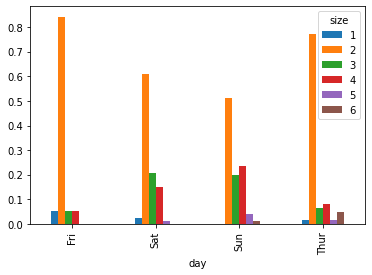

In [2]:
# 如果使用pandas绘图
tips = pd.read_csv('data/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])       # crosstab()
party_pcts = party_counts.div(party_counts.sum(1), axis=0)  # 标准化至和为1，即进行标准化以确保每一行值的和为1

party_pcts.plot.bar()

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

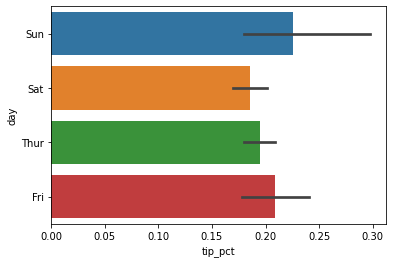

In [3]:
# 使用seaborn绘图
tips = pd.read_csv('data/tips.csv')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
# tipheadead()

sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

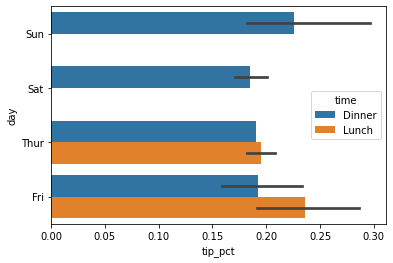

In [4]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
sns.set(style="whitegrid")

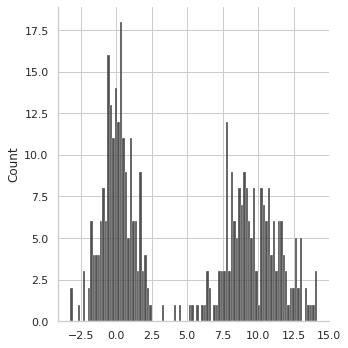

In [5]:
# 通过seaborn绘制直方图与密度图
comp1 = np.random.normal(0, 1, size=200)   # 正态分布数据
comp2 = np.random.normal(10, 2, size=200)

values = pd.Series(np.concatenate([comp1, comp2]))

sns.displot(values, bins=100, color='k')

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

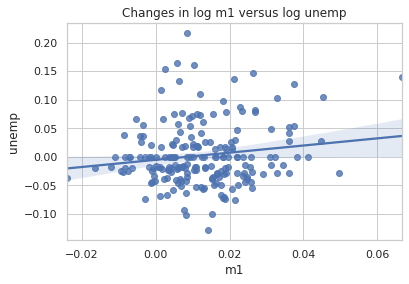

In [6]:
# 通过seaborn绘制散点图或点图
macro = pd.read_csv('data/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()

sns.regplot(x='m1', y='unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

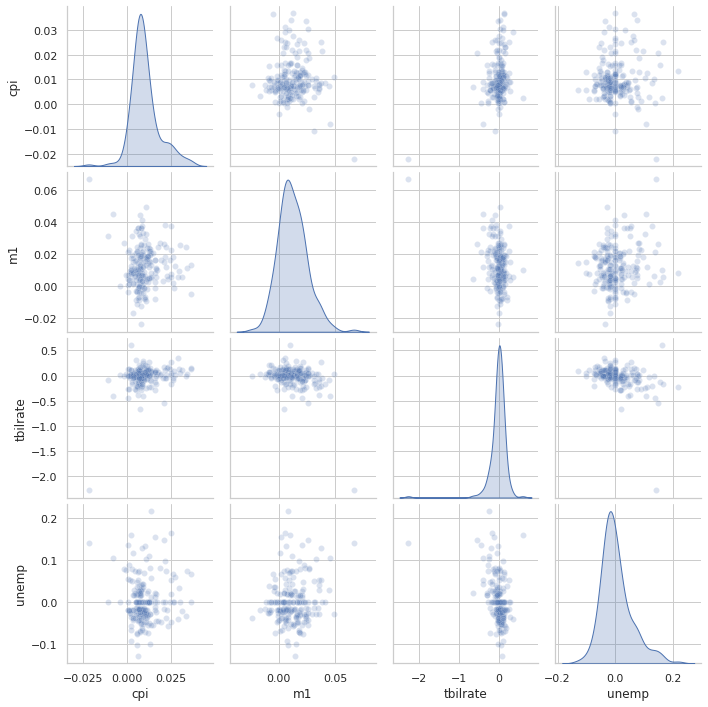

In [7]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

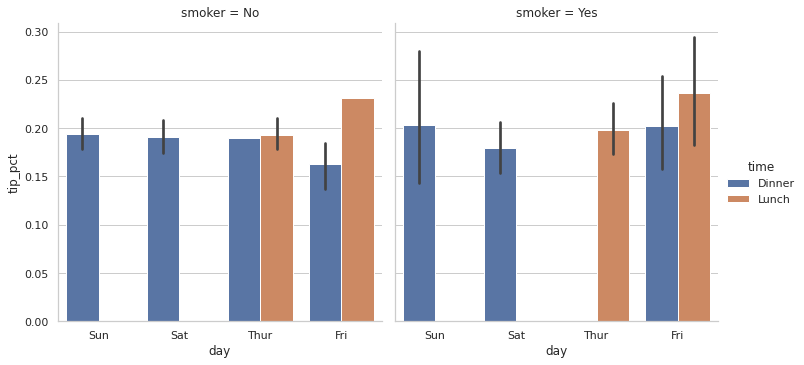

In [8]:
# 使用seaborn绘制分面网格
tips = pd.read_csv('data/tips.csv')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

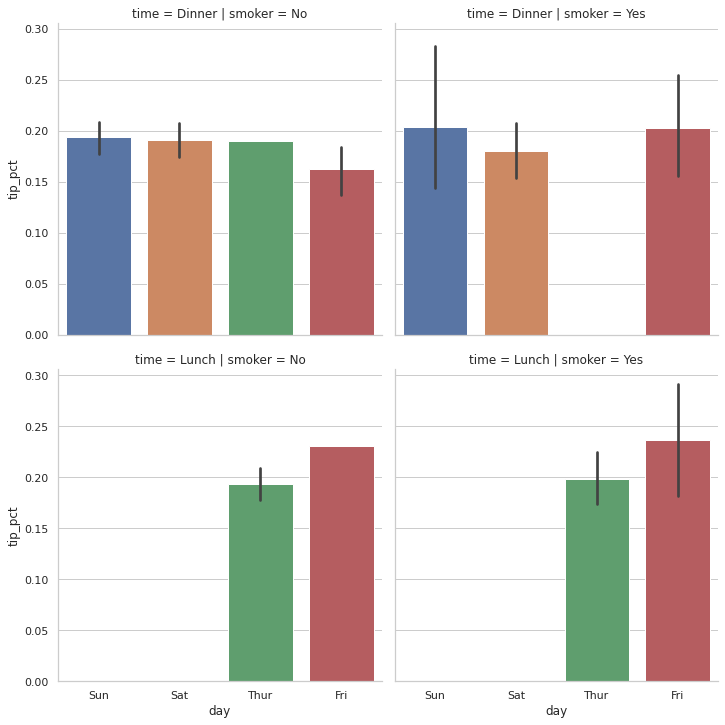

In [9]:
sns.catplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

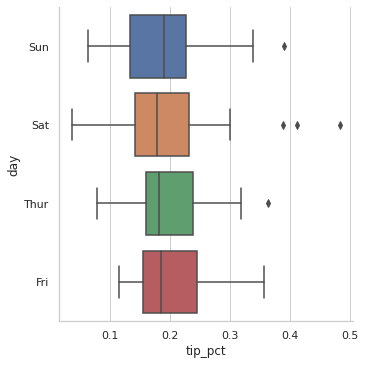

In [10]:
sns.catplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])